In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score


In [2]:
road = 2
direction = "out"
df = pd.read_csv(
    f"../dataset/cluster/2020-02-road{road}-{direction}-5cluster.csv", parse_dates=["datetime"])
df['label'] = df['cluster'].apply(lambda row: 1 if row == 2 or row == 1 else 0)
df


,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,inflow_units_N,outflow_units_N,avg_speed_N,cluster,label
0,2020-02-01 00:00:34,7,0,out,10,4,7,6,60,105,0,0,0.090909,0.194444,0.7500,2,1
1,2020-02-01 00:00:34,7,1,out,5,5,3,0,69,84,108,180,0.113636,0.083333,0.8625,3,0
2,2020-02-01 00:00:34,7,2,out,3,3,2,0,79,98,59,60,0.068182,0.055556,0.9875,3,0
3,2020-02-01 00:00:34,7,4,out,0,0,1,0,0,0,0,0,0.000000,0.027778,0.0000,1,1
4,2020-02-01 00:00:34,7,6,out,2,2,1,0,68,75,64,86,0.045455,0.027778,0.8500,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455371,2020-02-04 01:01:43,7,23,out,1,1,0,0,48,48,0,0,0.022727,0.000000,0.6000,2,1
455372,2020-02-04 01:01:43,7,26,out,0,0,2,0,0,0,0,0,0.000000,0.055556,0.0000,1,1
455373,2020-02-04 01:01:43,7,27,out,2,2,1,0,48,52,65,70,0.045455,0.027778,0.6000,2,1
455374,2020-02-04 01:01:43,7,28,out,1,1,2,0,61,61,61,61,0.022727,0.055556,0.7625,2,1


In [3]:
df.max(axis=0)

datetime           2020-02-04 01:01:43
road_number                          7
km                                 124
direction                          out
all_units                           69
inflow_units                        44
outflow_unit                        36
samecell_units                      46
avg_speed                           80
max_speed                          162
avg_traveltime                     712
max_traveltime                     951
inflow_units_N                     1.0
outflow_units_N                    1.0
avg_speed_N                        1.0
cluster                              4
label                                1
dtype: object

In [4]:
df_corr = df.filter(['all_units','inflow_units','outflow_unit','samecell_units','avg_speed','max_speed','avg_traveltime','max_traveltime','cluster','label'],axis=1)
corr = df_corr.corr()

<AxesSubplot:>

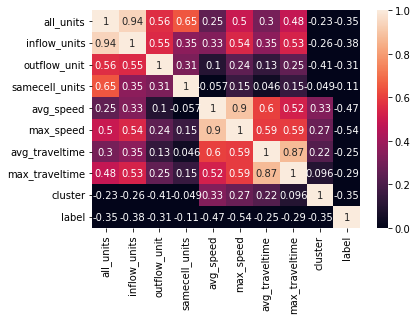

In [5]:
sns.heatmap(corr, vmin=0, vmax=1, annot=True)


In [6]:
num_cols = ['all_units', 'inflow_units',
            'avg_speed', 'max_speed',
            'avg_traveltime',"max_traveltime"]
num_cols

['all_units',
 'inflow_units',
 'avg_speed',
 'max_speed',
 'avg_traveltime',
 'max_traveltime']

In [7]:
X=df[num_cols]
y=df['cluster']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [10]:
y_pred = tree.predict(x_test)

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.58      0.57     17145
           1       1.00      1.00      1.00     18701
           2       0.91      0.90      0.90     51060
           3       0.93      0.93      0.93     50432
           4       0.95      0.94      0.95     12937

    accuracy                           0.89    150275
   macro avg       0.87      0.87      0.87    150275
weighted avg       0.89      0.89      0.89    150275



In [12]:
print(accuracy_score(y_test, y_pred))

0.887685909166528


In [13]:
import joblib
joblib.dump(tree, f"DecisionTreeModelRoad{road}{direction}.joblib")


['DecisionTreeModelRoad2out.joblib']